# Composite Explainability

In [1]:
import numpy as np
import pandas as pd

seed = 0

df = pd.read_csv('tmp/selected_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

df.head()

,"Flow rate__fft_aggregated__aggtype_""centroid""","Flow rate__fft_coefficient__coeff_1__attr_""angle""","Zone10_Pressure__fft_coefficient__coeff_2__attr_""real""","Zone11_Pressure__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","Zone11_Pressure__fft_aggregated__aggtype_""centroid""","Zone14_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone15_Pressure__augmented_dickey_fuller__attr_""teststat""","Zone15_Pressure__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Zone15_Pressure__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4",Zone15_Pressure__count_below_mean,...,"Zone31_Pressure__fft_coefficient__coeff_2__attr_""real""","Zone3_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone4_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone6_Pressure__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6","Zone6_Pressure__fft_coefficient__coeff_2__attr_""angle""",Zone6_Pressure__partial_autocorrelation__lag_2,"Zone7_Pressure__augmented_dickey_fuller__attr_""teststat""","Zone7_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone7_Pressure__fft_coefficient__coeff_3__attr_""angle""",target
0,49.084752,-120.106950,-7.922041e+04,148.990311,50.917722,103.922087,0.414992,41.544038,41.544038,637.0,...,-6.422572e+04,110.365035,110.278247,156.500929,114.538620,-0.269811,0.465443,92.618935,139.140951,0
1,51.389448,-110.924886,8.590550e+05,159.261794,61.470542,99.293878,3.125592,42.191759,42.191759,670.0,...,1.050872e+06,95.690130,95.042478,170.289578,101.596777,-0.043765,2.991166,71.918399,47.388674,0
2,32.345881,-156.802057,-1.078723e+06,60.594163,44.667697,105.809840,-1.049866,135.024234,135.024234,579.0,...,-8.241194e+05,125.073052,127.395796,131.877713,121.304061,-0.269597,-1.148494,86.354413,127.533329,0
3,46.956311,-136.572893,3.193206e+05,97.424653,58.688364,99.195454,0.190631,109.336323,109.336323,649.0,...,3.191185e+05,122.341734,121.163053,104.833596,113.813513,-0.203451,-0.118756,97.134776,33.477185,1
4,45.288313,-138.038339,-1.226468e+06,73.602326,52.136797,107.304441,-1.013413,58.622933,58.622933,614.0,...,-1.769839e+06,135.023802,133.033379,90.345308,120.139598,-0.241381,-0.864557,94.354414,133.792957,1


In [2]:
df.describe()

,"Flow rate__fft_aggregated__aggtype_""centroid""","Flow rate__fft_coefficient__coeff_1__attr_""angle""","Zone10_Pressure__fft_coefficient__coeff_2__attr_""real""","Zone11_Pressure__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","Zone11_Pressure__fft_aggregated__aggtype_""centroid""","Zone14_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone15_Pressure__augmented_dickey_fuller__attr_""teststat""","Zone15_Pressure__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Zone15_Pressure__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4",Zone15_Pressure__count_below_mean,...,"Zone31_Pressure__fft_coefficient__coeff_2__attr_""real""","Zone3_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone4_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone6_Pressure__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6","Zone6_Pressure__fft_coefficient__coeff_2__attr_""angle""",Zone6_Pressure__partial_autocorrelation__lag_2,"Zone7_Pressure__augmented_dickey_fuller__attr_""teststat""","Zone7_Pressure__fft_coefficient__coeff_2__attr_""angle""","Zone7_Pressure__fft_coefficient__coeff_3__attr_""angle""",target
count,10014.000000,10014.000000,1.001400e+04,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,...,1.001400e+04,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000
mean,43.540211,-137.940361,-2.435786e+05,94.220285,54.441802,93.364315,0.580265,75.714751,79.241362,614.275614,...,-1.739813e+05,109.565659,80.823118,116.944474,99.580889,-0.214076,0.974813,92.131484,59.350756,0.504793
std,8.357020,11.191113,1.310632e+06,37.035238,7.297225,56.243570,1.867364,32.377660,41.867409,44.932104,...,1.601842e+06,62.029449,98.046016,53.739633,87.434411,1.177168,2.313201,23.820951,87.746491,0.500002
min,15.075204,-165.508438,-4.503529e+06,-3.434749,27.708028,-179.848177,-4.009272,10.502318,10.502318,481.000000,...,-1.013044e+07,-179.988840,-179.959511,-22.526989,-179.975133,-112.894673,-5.470514,-178.880937,-179.978450,0.000000
25%,37.704985,-146.073213,-1.112239e+06,75.324124,49.863912,78.753965,-0.794437,51.104879,51.118922,583.000000,...,-1.102990e+06,101.536789,68.831053,88.488816,96.978711,-0.272599,-0.688200,77.002060,37.350247,0.000000
50%,45.298652,-138.109171,-1.080978e+05,95.385032,55.176746,102.941053,0.268064,70.734705,71.004134,608.000000,...,-1.591162e+05,121.037802,115.805532,111.037258,125.887132,-0.174555,0.492834,91.858679,76.486505,1.000000
75%,49.140672,-131.469093,5.829144e+05,114.344954,59.361908,123.880509,1.568520,95.495105,97.063615,639.000000,...,8.441093e+05,140.074338,143.481948,145.158458,146.701384,-0.100799,2.047756,106.287955,118.756683,1.000000
max,227.497896,0.320960,3.757302e+07,397.155970,227.088808,179.826087,14.019771,281.072411,471.477038,877.000000,...,4.128060e+07,179.942118,179.997005,659.228011,179.981794,2.579473,15.746552,178.247175,179.882137,1.000000


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed, stratify=y)

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_pred, y_true):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (6,4))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

##### RandomForestClassifier

In [5]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1492
           1       0.83      0.76      0.79      1813

    accuracy                           0.78      3305
   macro avg       0.78      0.78      0.78      3305
weighted avg       0.79      0.78      0.78      3305



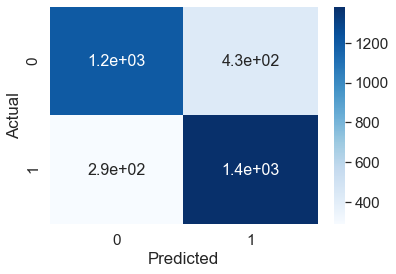

In [6]:
plot_confusion_matrix(y_pred, y_test)

##### XGBoostClassifier

In [7]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=10, n_estimators=100, random_state=seed)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
f1_score(y_pred, y_test)

0.7920114122681884

## SHAP

In [8]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X)

In [21]:
i = 200
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])

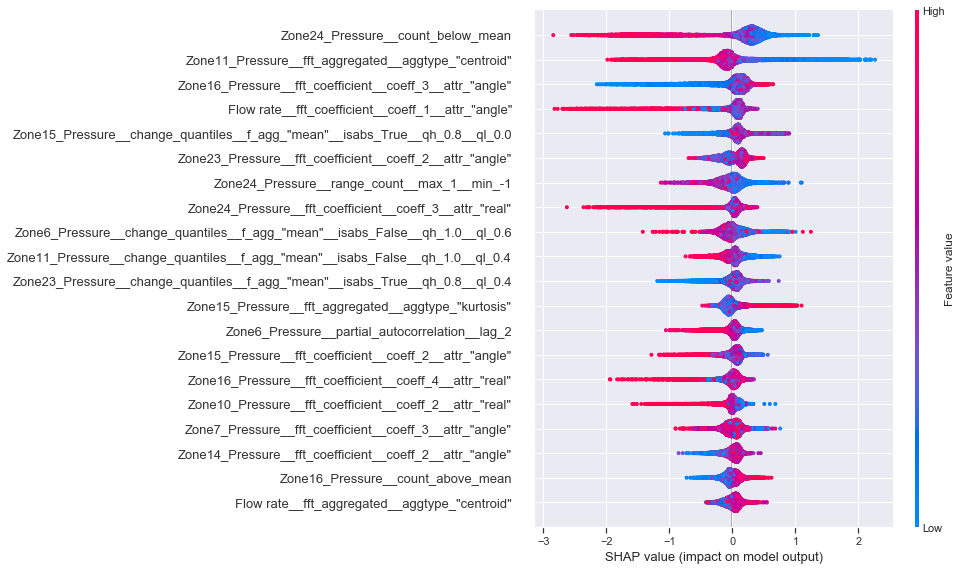

In [10]:
shap.summary_plot(shap_values, X)

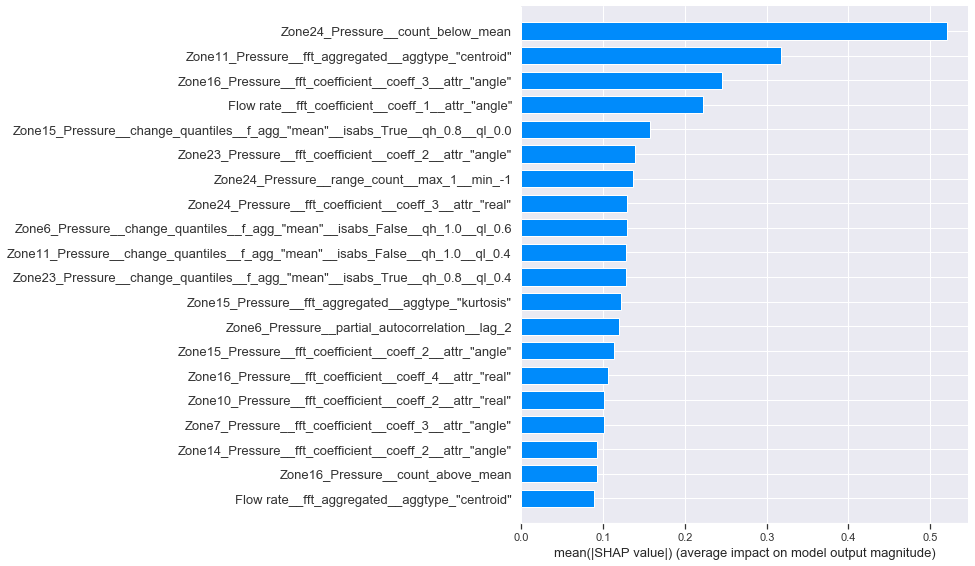

In [11]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Interpret

In [12]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(binning_strategy='uniform', data_n_episodes=2000,
                              early_stopping_run_length=50,
                              early_stopping_tolerance=1e-05,
                              feature_names=['Flow '
                                             'rate__fft_aggregated__aggtype_"centroid"',
                                             'Flow '
                                             'rate__fft_coefficient__coeff_1__attr_"angle"',
                                             'Zone10_Pressure__fft_coefficient__coeff_2__attr_"real"',
                                             'Zone11_Pressure__change_quantiles__f_...
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                            

In [13]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7901/2177665111240/ -->

In [14]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7901/2177715015112/ -->